# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('./Profissão- Cientista de Dados_M10_support material.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [5]:
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [4]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [12]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [13]:
df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

array(['01-2015', '02-2015', '03-2015', '04-2015', '05-2015', '06-2015',
       '07-2015', '08-2015', '09-2015', '10-2015', '11-2015', '12-2015',
       '01-2016', '02-2016', '03-2016'], dtype=object)

In [42]:
df['mes'] = df['data_ref'].dt.month
df['ano'] = df['data_ref'].dt.year
df['mes_ano'] = df['mes'].map(str) + '-' + df['ano'].map(str)

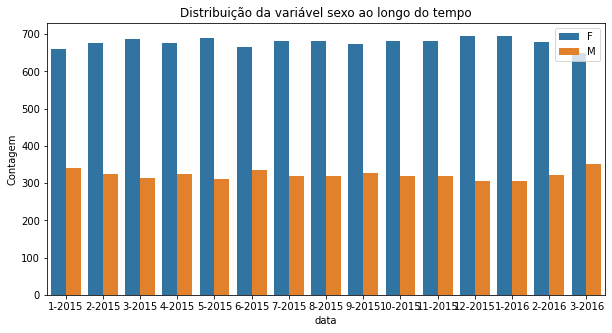

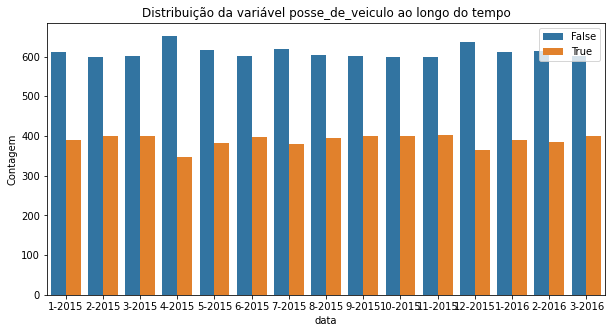

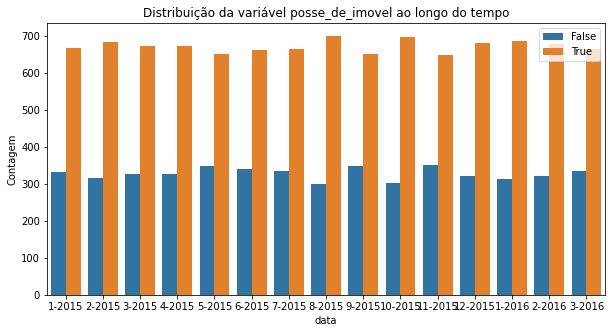

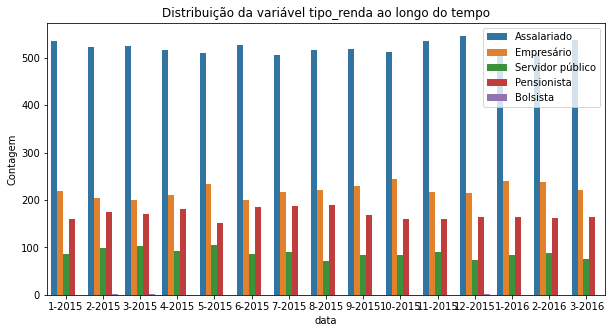

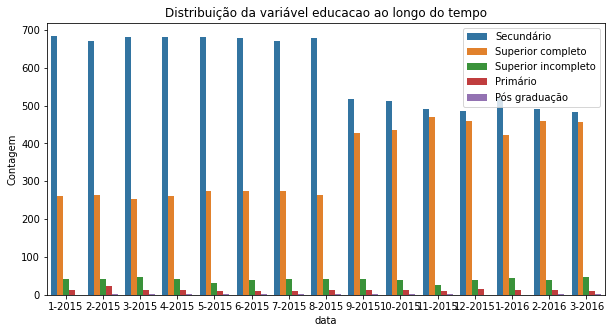

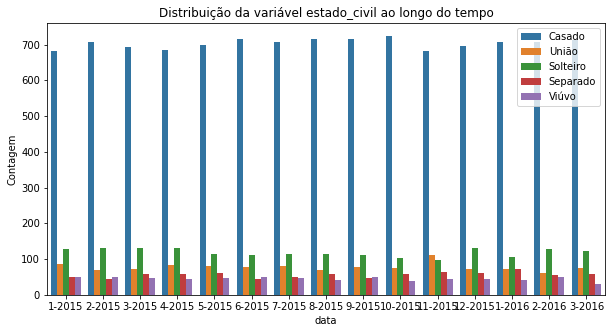

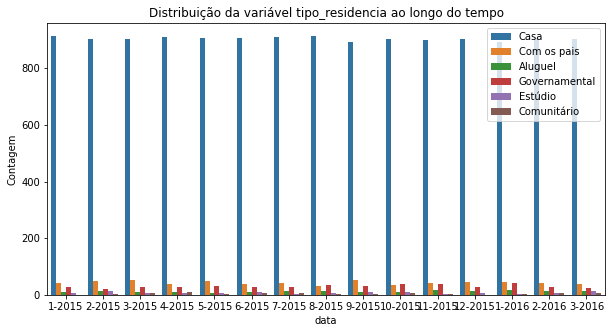

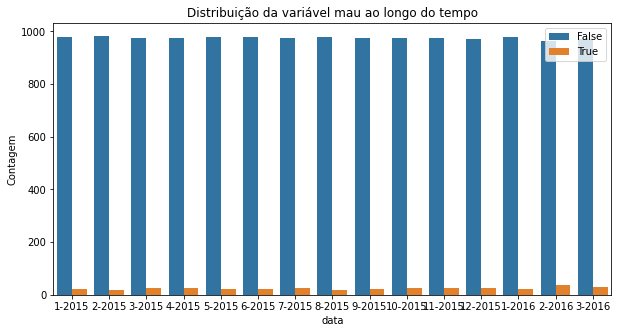

In [41]:
variaveis = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 
             'educacao', 'estado_civil', 'tipo_residencia', 'mau']


for var in variaveis:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x='mes_ano', hue=var, data=df)
    ax.set_title('Distribuição da variável {} ao longo do tempo'.format(var))
    ax.set_xlabel('data')
    ax.set_ylabel('Contagem')
    ax.legend(loc='upper right')
    plt.show()


Sim, variação da educação ao longo do tempo

2) Para cada variável quantitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

<AxesSubplot:xlabel='mes_ano', ylabel='qtd_filhos'>

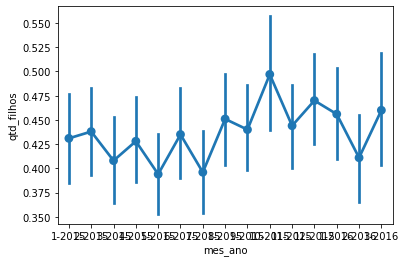

In [66]:
sns.pointplot(x='mes_ano', y='qtd_filhos', data=df, ci=95)

<AxesSubplot:xlabel='mes_ano', ylabel='idade'>

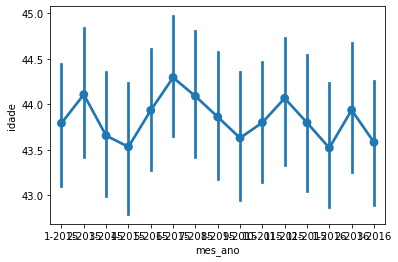

In [59]:
sns.pointplot(x='mes_ano', y='idade', data=df, ci=95)

<AxesSubplot:xlabel='mes_ano', ylabel='tempo_emprego'>

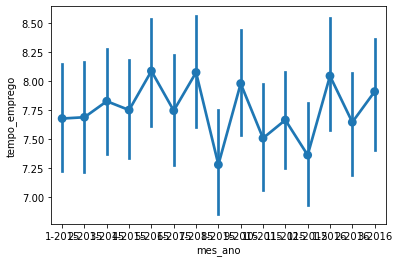

In [60]:
sns.pointplot(x='mes_ano', y='tempo_emprego', data=df, ci=95)

<AxesSubplot:xlabel='mes_ano', ylabel='qt_pessoas_residencia'>

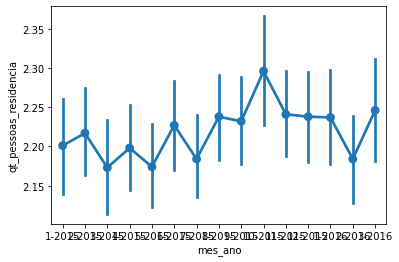

In [61]:
sns.pointplot(x='mes_ano', y='qt_pessoas_residencia', data=df, ci=95)

<AxesSubplot:xlabel='mes_ano', ylabel='renda'>

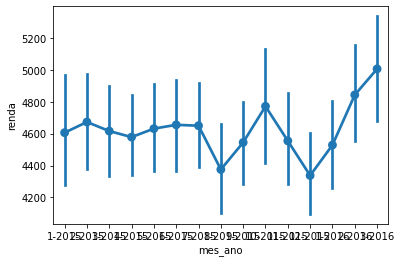

In [62]:
sns.pointplot(x='mes_ano', y='renda', data=df, ci=95)

Tanto a variável renda quanto tempo de emprego possuem alterações significantes, então dependendo da correlação com a variável resposta, eu não utilizaria essas variáveis na modelagem ou só usaria o período de tempo estável para treinar o modelo.